# Cleaning and Analyzing Employee Exit Surveys

In this project, we seek to learn the answers to the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We can do so using two datasets from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The former contains information such as why an employee's employment ended, and their start and end dates. The latter uses similar but nto identical measures, of reasons for employment ending, and length of total employment.

Let's begin by reading in the two datasets.

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print(tafe_survey.info())
print(tafe_survey.head(4))
print(tafe_survey['Gender. What is your Gender?'].value_counts())
#print(tafe_survey.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We can see there's a lot of stuff here in the TAFE dataset. 72 columns! Many are specific questions or fill in responses that not every employee would fill out or be applicable to answer. 

The column names are also in survey format, and thus very impractical for data analysis. I.E. column 66 is on gender, but rather than just being labeled 'Gender', or 'gender', it is 'Gender. What is your Gender?'. Even still, there are many null values in a column like this.

Let's do the same with the other dataset.

In [2]:
print(dete_survey.info())
print(dete_survey.head(4))
print(dete_survey['South Sea'].value_counts())
print(dete_survey['Gender'].value_counts())
#print(dete_survey.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

From the DETE dataset, we can see it seems a little cleaner and more organized than TAFE. There are a similar amount of rows (822 vs 702), and similar amount of columns, (56 vs 72). The column names are much clearer. The 'Gender' column is labeled as just that, 'Gender', with a much better rate of non-null values to total values. 

A couple columns stand out as being mostly null, such as 'South Sea', with only seven non null values, all of which are 'Yes'. Quite a few columns aren't missing a single value.

## Find Missing Values and Drop Unnecessary Columns

Let's re-read the dete_survey but noting that response 'Not Stated' may as well be null.

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Let's drop some columns we don't really want.

In [4]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Most of these columns were long questions or minute factors with null values. Not the focus of this analysis. For the columns that remain, we need to update their names to be more uniform and fit for analysis.

## Cleaning Column Names

As mentioned, the column names are a mess and not at all uniform. Let's fix the dete_survey columns by making them lowercase, removing white space, and replacing spaces with underscores.

In [5]:
print(dete_survey_updated.columns)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'int

These columns look much more manageable. Now let's turn to the tafe_survey dataset. Here the columns can't all be changed by the same function as the names differ too much. Instead, let's create a mapping for the columns we care about.

In [6]:
print(tafe_survey_updated.columns)
mapping = {'Record ID': 'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age'
,'Employment Type. Employment Type': 'employment_status' ,'Classification. Classification': 'position' ,'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(mapping, axis = 1, inplace = True)
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

Great! We can see from the printing before and after changing the column names that our changes have worked. The data should be much easier to read.

## Data Filtering

This large dataset includes employees who get fired or retire. Our goal is to look at employee dissatisfaction, and how long they worked before becoming dissatisfied. So we really only need to think about resignation. Let's look at the reasons for separation.

In [7]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


We want to isolate only the times when it was resignation. For the TAFE dataset this is simple, as there's only one value: 'Resignation'. For the DETE data, there are three different values, all of which begin with 'Resignation'. While it would be fun to use a RegEx to match all of these, as 'resignation is the same in each, we can just use the contains() function on a string. 

In [8]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
#We include the copy function to avoid the "SettingWithCopy" warning.
print(dete_resignations['separationtype'].value_counts())
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


We can see all that we are left with in the separationtype column is resignation-based reasons. The counts are consistent with the old counts for these values, so the other values have been successfully removed.

## Verifying the Data

We should check for wonky values, in things like dates, to see if there are any values that seem off. We can start with the 'cease_date' column in dete_resignations, to see years where emloymenet ended. 

In [9]:
print(dete_resignations['cease_date'].value_counts(dropna = False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64


We can see there are some simple dates, but some uinclude a month value. We need to extract just the year values.

In [10]:
import re
temp = dete_resignations['cease_date'].str.extract(r'([1:2]\d{3})')
dete_resignations['cease_date'] = temp[0].astype(float)

print(dete_resignations['cease_date'].value_counts(dropna = False))

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


This looks clean! We need to also look at the cease_date column in the other dataset, the TAFE data, along iwth the dete_start_date column in the same set.

In [11]:
print(tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending = False))
print(dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = False))

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64


We now have shown all the values for all three columns. The cease dates have nothing too unusual, all ending from 2010-14 with a few exceptions from 2006 and 2009 in TAFE. for the DETE start dates, there's many from recent years, but then continuing back since 1963, with just zero to five or so per year.

This intuitively makes sense, as there are likely more younger people resigning, and people who keep a job for a long time are less likely to resign than people who just start the same job if those starters decide it was not the right job for them.

## Creating a New Column so Datasets Match

The TAFE data has the column 'institute_service', which contains the amount of years an employee worked before resigning. The DETE set has no such column, but we can calculate and create one, as we have both the start year and the end year. 

In [12]:
dete_resignations['institute_service']  = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

We now have our new column, also named 'institute_service', which seems to have worked seamlessly based on the value_counts done on it.

## Identifying Dissatisfaction

We now want to determine why people resigned. So we can look at columns on the surveys that seem to ask that question. For the TAFE dataset, there is:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

Both seem to indicate that yes, the employee is dissatisfied. How about for the DETE dataset? LEt's look at these columns:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

There's a good variety here. All of them seem to indicate dissatisfaction. The first two have dissatisfaction in the name, and are no-brainers. Initially, for the remaining seven factors, I considered saying if 2/7 or 3/7 were true then the employee would be considered dissatisfied, but only 1/7 would be okay. However, if someone mentions that their 'workload' or 'employment_conditions' were a factor in them quitting, it is hard to say they weren't dissatisfied on some level. 

So the threshhold is if even one of these columns is 'True' for an employee, they will be marked dissatisfied. First we have to put our columns in 'True', 'False', or 'NaN' format.

In [13]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Here we can see that some employees are listed as a "dash" while some are marked as dissatisfied. We need to make it so NaN returns NaN, '-' returns False, and anything else returns True.

In [14]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_survey_updated[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We can see now the values were successfully converted. We need to check if the DETE values are in True or False form or not.

In [15]:
print(dete_resignations['workload'].value_counts(dropna = False))
print(dete_resignations['work_life_balance'].value_counts(dropna = False))
print(dete_resignations['employment_conditions'].value_counts(dropna = False))
print(dete_resignations['work_location'].value_counts(dropna = False))
print(dete_resignations['lack_of_job_security'].value_counts(dropna = False))
print(dete_resignations['physical_work_environment'].value_counts(dropna = False))
print(dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna = False))
print(dete_resignations['job_dissatisfaction'].value_counts(dropna = False))

False    284
True      27
Name: workload, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    270
True      41
Name: job_dissatisfaction, dtype: int64


We can see that all of these columns are already in True/False form, with no missing NaN values. Awesome! Now for both datasets, we will create a column, 'dissatsfied', which is 'True' if any of the indicator columns in its dataset are True. 

In [16]:
#List of indicator columns for the extensive DETE set and the TAFE set.
dete_indicators = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
tafe_indicators = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

dete_resignations['dissatisfied'] = dete_resignations[dete_indicators].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_indicators].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

We created copies to avoid the "SettingWithCopy" Warning. The new columns are created!

## Combining the Datasets

We now can aggregate our two data sources as many of the important columns match up in their formatting. First though, so we can tell which is which, we will add a column indicating which institute or dataset the information is from.

In [17]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(axis = 1, thresh = 500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


We concatenated the data, combining them together vertically! Then, for columns not present in both sets, or with two many null values, we discard. We chose 500 as a basemark as that's more than in either one dataset but less than both together. We are left with limited null values and a clear group of categories.

## More Column Cleaning...

The institute_service column has some issues we can see if we run the value_counts.

In [18]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


The issue is that the format of the different values differs between the two original datasets. One had each numeric year, the other had string ranges. We need to standardize these values. 
We can use these ranges:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We can take a shortcut in our RegEx, as if we just take the first number in each value, we are left in the correct range. For example, taking the first number in '1-2' returns '1', which is categorized correctly under 'Less than 3 years', and the first number in 'More than 20 years' returns 20, which is correctly categorized as '11 or more'.

In [19]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).copy()
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract('(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)
combined_updated['institute_service'].value_counts(dropna = False)

<ipython-input-19-af7064fc5e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype(str).copy()
<ipython-input-19-af7064fc5e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].str.extract('(\d+)')
<ipython-input-19-af7064fc5e12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [20]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)
combined_updated['service_cat'].value_counts()

<ipython-input-20-143785e91dc7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

We created a function to determine the different level of experience for any year, and then applied that function on the entire institute_service column, and put that on a new column, service_cat, which just has the different levels of experience.

In [21]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

<ipython-input-22-d48f78150ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)


False    411
True     240
Name: dissatisfied, dtype: int64

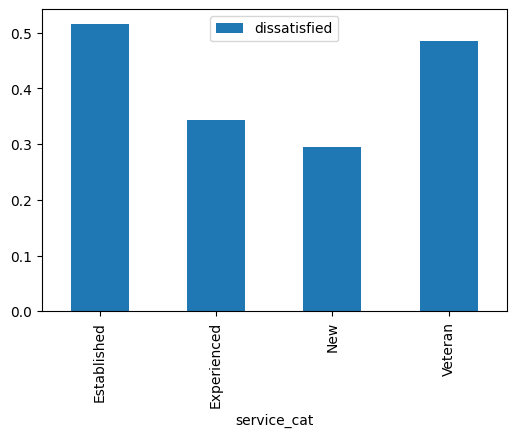

In [23]:
import matplotlib.pyplot as plt
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Percentage of dissatisfied employees in each service category
dissatisfied_percentage = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
# Plot the results
%matplotlib inline
dissatisfied_percentage.plot(kind='bar')
plt.show()

## Conclusion

We can see here that the longer an employee has worked, the more likely they are to be dissatisfied if they resign. This makes sense, as newer employees may leave because they just find another job to move up with or are fired, while seasoned employees are unlikely to be fired and have shown they aren't looking to quickly move to another job, so another reason must be present for them to leave, such as dissatisfaction.